In [2]:
#Import relevant libraries
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.ticker as mtick
import matplotlib.pyplot as plt
%matplotlib inline

import geopandas as gpd
import geoplot as gplt

In [3]:
#Set visualization style & display
plt.style.use('seaborn-whitegrid')
sns.set_style('whitegrid')
sns.color_palette("mako")
pd.set_option('display.max_columns', None)

from IPython.core.display import HTML
HTML("""
<style>
.output_png {
    display: table-cell;
    text-align: center;
    vertical-align: middle;
}
</style>
""")

### Import Datasets

In [4]:
# 1) Import Training Data
trainset = pd.read_csv('Data/Training set values.xls')
trainset.head()

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,subvillage,region,region_code,district_code,lga,ward,population,public_meeting,recorded_by,scheme_management,scheme_name,permit,construction_year,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
0,69572,6000.0,3/14/2011,Roman,1390,Roman,34.938093,-9.856322,none,0,Lake Nyasa,Mnyusi B,Iringa,11,5,Ludewa,Mundindi,109,True,GeoData Consultants Ltd,VWC,Roman,False,1999,gravity,gravity,gravity,vwc,user-group,pay annually,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
1,8776,0.0,3/6/2013,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,Lake Victoria,Nyamara,Mara,20,2,Serengeti,Natta,280,NaN,GeoData Consultants Ltd,Other,NaN,True,2010,gravity,gravity,gravity,wug,user-group,never pay,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe
2,34310,25.0,2/25/2013,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,Pangani,Majengo,Manyara,21,4,Simanjiro,Ngorika,250,True,GeoData Consultants Ltd,VWC,Nyumba ya mungu pipe scheme,True,2009,gravity,gravity,gravity,vwc,user-group,pay per bucket,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe
3,67743,0.0,1/28/2013,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,Ruvuma / Southern Coast,Mahakamani,Mtwara,90,63,Nanyumbu,Nanyumbu,58,True,GeoData Consultants Ltd,VWC,NaN,True,1986,submersible,submersible,submersible,vwc,user-group,never pay,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe
4,19728,0.0,7/13/2011,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,Lake Victoria,Kyanyamisa,Kagera,18,1,Karagwe,Nyakasimbi,0,True,GeoData Consultants Ltd,NaN,NaN,True,0,gravity,gravity,gravity,other,other,never pay,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe


In [5]:
# 2) Import Training Data values
trainlabels = pd.read_csv('Data/Training set labels.xls')
trainlabels.head()

,id,status_group
0,69572,functional
1,8776,functional
2,34310,functional
3,67743,non functional
4,19728,functional


In [6]:
#Check Column names
trainset.columns

Index(['id', 'amount_tsh', 'date_recorded', 'funder', 'gps_height',
       'installer', 'longitude', 'latitude', 'wpt_name', 'num_private',
       'basin', 'subvillage', 'region', 'region_code', 'district_code', 'lga',
       'ward', 'population', 'public_meeting', 'recorded_by',
       'scheme_management', 'scheme_name', 'permit', 'construction_year',
       'extraction_type', 'extraction_type_group', 'extraction_type_class',
       'management', 'management_group', 'payment', 'payment_type',
       'water_quality', 'quality_group', 'quantity', 'quantity_group',
       'source', 'source_type', 'source_class', 'waterpoint_type',
       'waterpoint_type_group'],
      dtype='object')

In [7]:
#Check for duplicates
print("Train Data: ", trainset.duplicated().sum())
print("Traing Labels: ", trainlabels.duplicated().sum())

Train Data:  0
Traing Labels:  0


## Cleaning the Data

In [8]:
#Check DataFrame information
trainset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59400 entries, 0 to 59399
Data columns (total 40 columns):
id                       59400 non-null int64
amount_tsh               59400 non-null float64
date_recorded            59400 non-null object
funder                   55765 non-null object
gps_height               59400 non-null int64
installer                55745 non-null object
longitude                59400 non-null float64
latitude                 59400 non-null float64
wpt_name                 59400 non-null object
num_private              59400 non-null int64
basin                    59400 non-null object
subvillage               59029 non-null object
region                   59400 non-null object
region_code              59400 non-null int64
district_code            59400 non-null int64
lga                      59400 non-null object
ward                     59400 non-null object
population               59400 non-null int64
public_meeting           56066 non-null object
r

### Dealing with Null Values

In [9]:
#Check for null values
trainset.isna().sum()

id                           0
amount_tsh                   0
date_recorded                0
funder                    3635
gps_height                   0
installer                 3655
longitude                    0
latitude                     0
wpt_name                     0
num_private                  0
basin                        0
subvillage                 371
region                       0
region_code                  0
district_code                0
lga                          0
ward                         0
population                   0
public_meeting            3334
recorded_by                  0
scheme_management         3877
scheme_name              28166
permit                    3056
construction_year            0
extraction_type              0
extraction_type_group        0
extraction_type_class        0
management                   0
management_group             0
payment                      0
payment_type                 0
water_quality                0
quality_

##### 1) Management Data

In [10]:
#'scheme_management' and 'management' columns seem to have similar entries

#Compare 'scheme_management' and 'management' column entries
trainset.scheme_management = trainset.scheme_management.str.lower() #Change entries to lowercase for comparison
print('Both entries are the same: ', trainset.loc[trainset.scheme_management == trainset.management].shape[0])
print('Both entries differ total: ', trainset.loc[trainset.scheme_management != trainset.management].shape[0])
print('Both entries differ (Only non-null): ', trainset.loc[(trainset.scheme_management != trainset.management) &
                                              (trainset.scheme_management.isna() == False)].shape[0])
print('Difference because of null value: ', trainset.scheme_management.isna().sum())

Both entries are the same:  49336
Both entries differ total:  10064
Both entries differ (Only non-null):  6187
Difference because of null value:  3877


In [11]:
print('Management: \n', trainset.management.value_counts(), '\n\n')
print('Operator (scheme_management): \n', trainset.scheme_management.value_counts())

Management: 
 vwc                 40507
wug                  6515
water board          2933
wua                  2535
private operator     1971
parastatal           1768
water authority       904
other                 844
company               685
unknown               561
other - school         99
trust                  78
Name: management, dtype: int64 


Operator (scheme_management): 
 vwc                 36793
wug                  5206
water authority      3153
wua                  2883
water board          2748
parastatal           1680
private operator     1063
company              1061
other                 766
swc                    97
trust                  72
none                    1
Name: scheme_management, dtype: int64


In [12]:
#The 'scheme_management' and 'management' columns are similar
#Replace the null values in 'scheme_management' with their equivalent in 'management'

#Trainset
indexmodlist = list(trainset.loc[trainset.scheme_management.isna() == True].index) #Compile list of indexes of null values
for index in indexmodlist:
    trainset.loc[index, 'scheme_management'] = trainset.loc[index, 'management'] #Replace with associated value

#Verify entries
print(trainset.scheme_management.isna().sum())
trainset.head()

0


,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,subvillage,region,region_code,district_code,lga,ward,population,public_meeting,recorded_by,scheme_management,scheme_name,permit,construction_year,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
0,69572,6000.0,3/14/2011,Roman,1390,Roman,34.938093,-9.856322,none,0,Lake Nyasa,Mnyusi B,Iringa,11,5,Ludewa,Mundindi,109,True,GeoData Consultants Ltd,vwc,Roman,False,1999,gravity,gravity,gravity,vwc,user-group,pay annually,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
1,8776,0.0,3/6/2013,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,Lake Victoria,Nyamara,Mara,20,2,Serengeti,Natta,280,NaN,GeoData Consultants Ltd,other,NaN,True,2010,gravity,gravity,gravity,wug,user-group,never pay,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe
2,34310,25.0,2/25/2013,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,Pangani,Majengo,Manyara,21,4,Simanjiro,Ngorika,250,True,GeoData Consultants Ltd,vwc,Nyumba ya mungu pipe scheme,True,2009,gravity,gravity,gravity,vwc,user-group,pay per bucket,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe
3,67743,0.0,1/28/2013,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,Ruvuma / Southern Coast,Mahakamani,Mtwara,90,63,Nanyumbu,Nanyumbu,58,True,GeoData Consultants Ltd,vwc,NaN,True,1986,submersible,submersible,submersible,vwc,user-group,never pay,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe
4,19728,0.0,7/13/2011,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,Lake Victoria,Kyanyamisa,Kagera,18,1,Karagwe,Nyakasimbi,0,True,GeoData Consultants Ltd,other,NaN,True,0,gravity,gravity,gravity,other,other,never pay,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe


##### 2) Funder v. Installer

In [13]:
#Compare 'funder' and 'installer' data

#Adjust entry format to better compare
trainset.funder = trainset.funder.str.title()
trainset.installer = trainset.installer.str.title()

#Compare entries
print('Both entries are the same: ', trainset.loc[trainset.funder == trainset.installer].shape[0])
print('Both entries differ total: ', trainset.loc[trainset.funder != trainset.installer].shape[0])
print('Both entries differ (non-null only): ', trainset.loc[(trainset.funder != trainset.installer) &
                                                           (trainset.funder.isna() == False) &
                                                           (trainset.installer.isna() == False)].shape[0])
print('Both entries are null: ', trainset.loc[(trainset.funder.isna() == True) & (trainset.installer.isna() == True)].shape[0])

Both entries are the same:  18930
Both entries differ total:  40470
Both entries differ (non-null only):  36762
Both entries are null:  3582


In [14]:
#Compare unique entries
print('Funder: \n', trainset.funder.value_counts(), '\n\n')
print('Installer: \n', trainset.installer.value_counts())

Funder: 
 Government Of Tanzania    9084
Danida                    3114
Hesawa                    2202
Rwssp                     1374
World Bank                1349
                          ... 
Piscope                      1
Msigwa                       1
Birage                       1
Rdws                         1
Rural                        1
Name: funder, Length: 1897, dtype: int64 


Installer: 
 Dwe               17405
Government         1891
Hesawa             1395
Rwe                1206
Commu              1065
                  ...  
Dhv Moro              1
Njula                 1
Nassan Workers        1
Community Bank        1
Dmmd                  1
Name: installer, Length: 1935, dtype: int64


In [15]:
#Replace the null values with new 'Unknown' category
#Train set
trainset.funder.fillna('Unknown', inplace = True)
trainset.installer.fillna('Unknown', inplace = True)

##### 3) Permit

In [16]:
#Check Values
trainset.permit.value_counts()

True     38852
False    17492
Name: permit, dtype: int64

In [17]:
trainset.permit.isna().sum()

3056

In [18]:
#Compare null values to data on funders, installers, operators and management
print('Installer or Funder Unknown: ', trainset.loc[(trainset.permit.isna() == True) &
            ((trainset.funder == 'Unknown' ) | (trainset.installer == 'Unknown'))].shape[0] )
print('Operator or Management Parastatal/Water Authority: ', trainset.loc[(trainset.permit.isna() == True) &
                                                      ((trainset.scheme_management == 'paastatal') |
                                                      (trainset.scheme_management == 'water authority') |
                                                      (trainset.management == 'parastatal') |
                                                      (trainset.management == 'water authority'))].shape[0])

Installer or Funder Unknown:  2424
Operator or Management Parastatal/Water Authority:  370


In the majority of cases of unknown permits, the funders and/or installers are unknown, so we can assume that there is no permit in these cases.
But, if the operator or management is parastatal or the water authority then a permit is assumed due to the connection with authorities. 

In [19]:
#Change null values according to assumptions above
indexmodlist = list(trainset.loc[trainset.permit.isna() == True].index) #Compile list of indexes of rows to change

for i in indexmodlist:
    if trainset.loc[i, 'scheme_management'] == 'parastatal':
        trainset.loc[i, 'permit'] = True
    elif trainset.loc[i, 'scheme_management'] == 'water authority':
        trainset.loc[i, 'permit'] = True
    elif trainset.loc[i, 'management'] == 'parastatal':
        trainset.loc[i, 'permit'] = True
    elif trainset.loc[i, 'management'] == 'water authority':
        trainset.loc[i, 'permit'] = True
    else:
        trainset.loc[i, 'permit'] = False

In [20]:
#Verify 'permit' Series for null values
print('Number of null values: ', trainset.permit.isna().sum())
trainset.permit.value_counts()

Number of null values:  0


True     39223
False    20177
Name: permit, dtype: int64

##### 4) Subvillage

In [21]:
#Check unique values 
trainset.subvillage.value_counts()

Madukani        508
Shuleni         506
Majengo         502
Kati            373
Mtakuja         262
               ... 
Nyansebe          1
Itawa             1
Nguvu Kazi A      1
Sanjemgambo       1
Stebdi            1
Name: subvillage, Length: 19287, dtype: int64

In [22]:
#The number of unique values is very large, while the number of null values is very low
#So best to create new 'Unknown' category rather than lose data

trainset.subvillage.fillna('Unknown', inplace = True)

##### 5) Public Meeting

In [23]:
trainset.public_meeting.value_counts()

True     51011
False     5055
Name: public_meeting, dtype: int64

`public_meeting` appears to be open to some degree of interpretation, but with the large majority of entries being 'True', the understood interpretation is that the water well in question is accessible to the public. In this case, the null values can likely be assumed to be 'True' as well. 

Furthermore, there doesn't seem to be an apparent connection between `public_meeting` and either the managemenet, operatos, funders or installers at first glance, so the meaning is unlikely one of political significance. 

In [24]:
#Replace NaN with 'True' as more likely option
trainset.public_meeting.fillna('True', inplace = True)

#### Re-Check for null values

In [25]:
#Recheck training dataframe for null values
trainset.isna().sum()

id                           0
amount_tsh                   0
date_recorded                0
funder                       0
gps_height                   0
installer                    0
longitude                    0
latitude                     0
wpt_name                     0
num_private                  0
basin                        0
subvillage                   0
region                       0
region_code                  0
district_code                0
lga                          0
ward                         0
population                   0
public_meeting               0
recorded_by                  0
scheme_management            0
scheme_name              28166
permit                       0
construction_year            0
extraction_type              0
extraction_type_group        0
extraction_type_class        0
management                   0
management_group             0
payment                      0
payment_type                 0
water_quality                0
quality_

### Drop unnecessary and/or uninteresting columns

- `num_private` - data contained is unclear, only '0' values
- `recorded_by` - contains only one single constant entry ('GeoData Consultants Ltd'), so it's not interestng for analysis purposes
- `date_recorded` - the data provides an interesting point of chronological reference for the geopolitical situation in Tanzania, but doesn't serve much purpose in the DataFrame for present purposes. 

**The recorded years are split as follows:** `{'2011': 28674, '2013': 24271, '2012': 6424, '2004': 30, '2002': 1}`

- `scheme_name` - this columns contains a very large number of null values and unique entries. In addition, there is already another column (`scheme_management`) that is labeled as indicating who operates the wells in question. There is also additionally the `management` and `management_group` Series for additional clarity on management.
- `extraction_type_group` - contains the same information as `extraction_type` and `extraction_type_group`. The former is the most specific breakdown, while the latter groups extraction along more manageble categories. Both of these can be explored, which leaves `extraction_type_group` in the middle with little purpose. 
- `payment type` - contains the exact same information as `payment`.
- `quality group` - contains the same information as `water quality`, with a few differences ("good" instead of "soft", and `water quality` furthe differentiates between 'salty' and 'salty abandoned', as well as 'fluoride' and 'fluoride abandoned'). 
- `quantity_goup` - contains the exact same entries as `quantity`. Only `quantity` will be kept. 
- `source_type` - this Series contains almost exactly the same entries as `source`, with the latter being more detailed in its categories. 
- `waterpoint_type_group` - this Series contains the exact same entries as `waterpoint_type`, with the exception that `waterpoint_type` provides the additional differential between 'communal standpipe' and 'communal standpipe multiple', therefore there is little purpose in keeping `waterpoing_type_group`

In [26]:
#Drop unnecessary and/or uninteresting columns
trainset.drop(['num_private', 'recorded_by', 'date_recorded', 'scheme_name', 'extraction_type_group', 
               'payment_type', 'quality_group', 'quantity', 
               'source_type', 'waterpoint_type_group'], axis = 1, inplace = True)

### Check the data types of each Series

In [27]:
trainset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59400 entries, 0 to 59399
Data columns (total 30 columns):
id                       59400 non-null int64
amount_tsh               59400 non-null float64
funder                   59400 non-null object
gps_height               59400 non-null int64
installer                59400 non-null object
longitude                59400 non-null float64
latitude                 59400 non-null float64
wpt_name                 59400 non-null object
basin                    59400 non-null object
subvillage               59400 non-null object
region                   59400 non-null object
region_code              59400 non-null int64
district_code            59400 non-null int64
lga                      59400 non-null object
ward                     59400 non-null object
population               59400 non-null int64
public_meeting           59400 non-null object
scheme_management        59400 non-null object
permit                   59400 non-null bool
co

In [28]:
#Change boolean to categorical types
trainset.permit = trainset.permit.astype("category")

# Exploratory Data Analysis and Visualization

In [29]:
#Define function to create sub datafames for visualizations
def create_sg_subdf(seriesName, norm = True):
    """This function creates a workable dataframe 
    grouping a Series by status_group"""
    
    subdf = df.groupby('status_group')[seriesName].value_counts(normalize = norm).unstack()
    return subdf

In [30]:
#Join trainset and trainlabels DataFrames
df = pd.merge(trainlabels, trainset, on = 'id', how = 'inner')
df.head()

,id,status_group,amount_tsh,funder,gps_height,installer,longitude,latitude,wpt_name,basin,subvillage,region,region_code,district_code,lga,ward,population,public_meeting,scheme_management,permit,construction_year,extraction_type,extraction_type_class,management,management_group,payment,water_quality,quantity_group,source,source_class,waterpoint_type
0,69572,functional,6000.0,Roman,1390,Roman,34.938093,-9.856322,none,Lake Nyasa,Mnyusi B,Iringa,11,5,Ludewa,Mundindi,109,True,vwc,False,1999,gravity,gravity,vwc,user-group,pay annually,soft,enough,spring,groundwater,communal standpipe
1,8776,functional,0.0,Grumeti,1399,Grumeti,34.698766,-2.147466,Zahanati,Lake Victoria,Nyamara,Mara,20,2,Serengeti,Natta,280,True,other,True,2010,gravity,gravity,wug,user-group,never pay,soft,insufficient,rainwater harvesting,surface,communal standpipe
2,34310,functional,25.0,Lottery Club,686,World Vision,37.460664,-3.821329,Kwa Mahundi,Pangani,Majengo,Manyara,21,4,Simanjiro,Ngorika,250,True,vwc,True,2009,gravity,gravity,vwc,user-group,pay per bucket,soft,enough,dam,surface,communal standpipe multiple
3,67743,non functional,0.0,Unicef,263,Unicef,38.486161,-11.155298,Zahanati Ya Nanyumbu,Ruvuma / Southern Coast,Mahakamani,Mtwara,90,63,Nanyumbu,Nanyumbu,58,True,vwc,True,1986,submersible,submersible,vwc,user-group,never pay,soft,dry,machine dbh,groundwater,communal standpipe multiple
4,19728,functional,0.0,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,Lake Victoria,Kyanyamisa,Kagera,18,1,Karagwe,Nyakasimbi,0,True,other,True,0,gravity,gravity,other,other,never pay,soft,seasonal,rainwater harvesting,surface,communal standpipe


### Looking at Functionality Status Group Spread

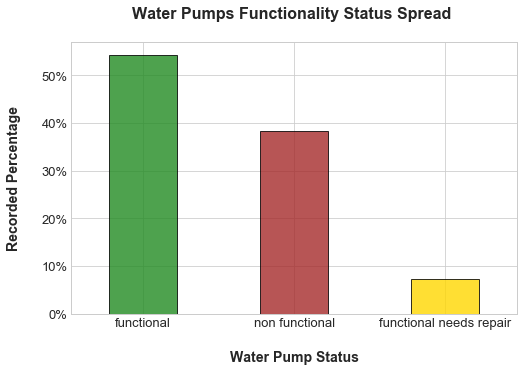

In [31]:
#Plot the status _group spread
ax = df.status_group.value_counts(normalize = True).plot(kind = 'bar', width = .45, figsize = (8, 5), 
                                                         color = ['forestgreen', 'brown', 'gold'],
                                                         edgecolor = 'black', alpha = .8)

#Format x- and y-axis
plt.xticks(fontsize = 13,  rotation = 0)
plt.xlabel('\nWater Pump Status', fontweight = 'bold', fontsize = 14 )
ax.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))
plt.yticks(fontsize = 13)
plt.ylabel('Recorded Percentage\n', fontweight = 'bold', fontsize = 14)

#Format plot
plt.title('Water Pumps Functionality Status Spread \n', fontsize = 16, fontweight = 'bold');

In [51]:
#Import geodata base maps
districts = gpd.read_file('stanford-tn398yw9512-shapefile/')
rivers = gpd.read_file('AFRICOVER_TZ_RIVERS-shapefile')

In [66]:
#Create working dataframes for well location by functionality
loc_functional = df.loc[(df.longitude != 0) & (df.status_group == 'functional'), ['longitude', 'latitude']]
loc_repair = df.loc[(df.longitude != 0) & (df.status_group == 'functional needs repair'), ['longitude', 'latitude']]
loc_nonfunctional = df.loc[(df.longitude != 0) & (df.status_group == 'non functional'), ['longitude', 'latitude']]

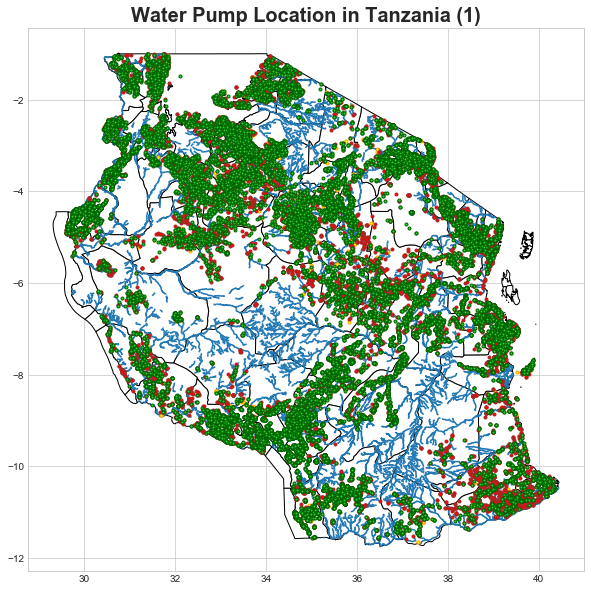

In [99]:
fig,ax = plt.subplots(figsize = (20, 10))

ax.set_aspect('equal')
#Create base map
districts.plot(ax = ax, color = 'white', edgecolor = 'black', zorder = 1)
rivers.plot(ax = ax, zorder = 1);

#Add well locations
ax.scatter(loc_repair.longitude, loc_repair.latitude, color = 'yellow', marker = '.', edgecolor = 'orange')
ax.scatter(loc_nonfunctional.longitude, loc_nonfunctional.latitude, marker = '.', color = 'red', edgecolor = 'brown');
ax.scatter(loc_functional.longitude, loc_functional.latitude, color = 'limegreen', edgecolor = 'darkgreen', 
           marker = '.')

plt.title("Water Pump Location in Tanzania (1)", fontsize = 20, fontweight = 'bold');

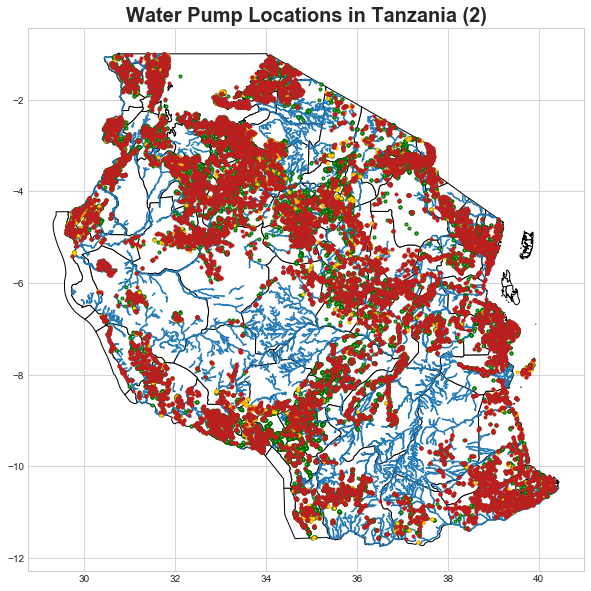

In [98]:
fig,ax = plt.subplots(figsize = (20, 10))
ax.set_aspect('equal')

#Create base map
districts.plot(ax = ax, color = 'white', edgecolor = 'black', zorder = 1)
rivers.plot(ax = ax, zorder = 1);

#Add well locations
ax.scatter(loc_functional.longitude, loc_functional.latitude, color = 'limegreen', edgecolor = 'darkgreen', 
           marker = '.')
ax.scatter(loc_repair.longitude, loc_repair.latitude, color = 'yellow', marker = '.', edgecolor = 'orange')
ax.scatter(loc_nonfunctional.longitude, loc_nonfunctional.latitude, marker = '.', color = 'red', edgecolor = 'brown')

plt.title("Water Pump Locations in Tanzania (2)", fontsize = 20, fontweight = 'bold');

In [90]:
#Create working dataframe well location by permit
loc_ypermit = df.loc[(df.longitude != 0) & (df.permit == True), ['longitude', 'latitude']]
loc_npermit = df.loc[(df.longitude != 0) & (df.permit == False), ['longitude', 'latitude']]

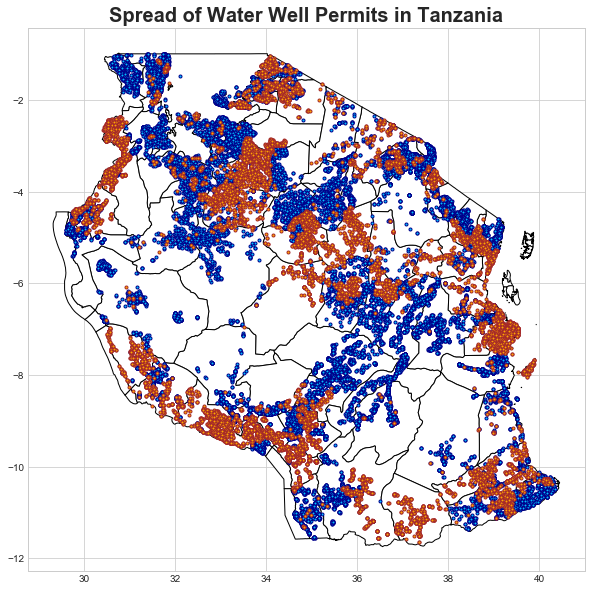

In [96]:
fig,ax = plt.subplots(figsize = (20, 10))
ax.set_aspect('equal')

#Create base map
districts.plot(ax = ax, color = 'white', edgecolor = 'black')

#Add well locations
ax.scatter(loc_ypermit.longitude, loc_ypermit.latitude, color = 'deepskyblue', edgecolor = 'darkblue', 
           marker = '.')
ax.scatter(loc_npermit.longitude, loc_npermit.latitude, color = 'orange', marker = '.', edgecolor = 'brown')


plt.title("Spread of Water Well Permits in Tanzania", fontsize = 20, fontweight = 'bold');

## Well Water Characteristics

### Amount of Water Available to Waterpoint

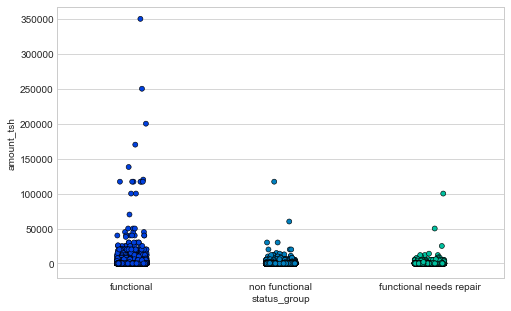

In [47]:
fig, ax = plt.subplots(figsize = (8, 5))
sns.stripplot(x = 'status_group', y = 'amount_tsh', data = df, edgecolor = 'black', linewidth = .6,  ax = ax,
             palette = "winter");

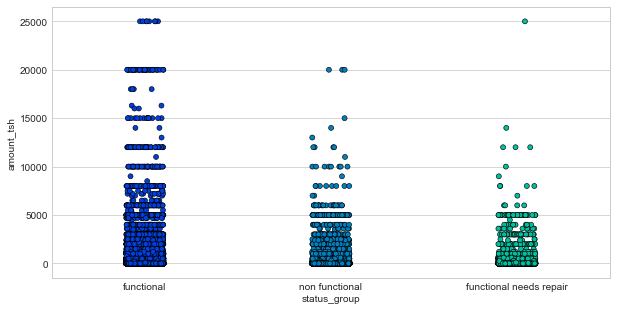

In [48]:
#Zooming in, by eliminating outliers
#Create working DataFrame
zoomeddf = df.loc[df['amount_tsh'] <= 25000]

#Plot water amount per category
fig, ax = plt.subplots(figsize = (10, 5))
sns.stripplot(x = 'status_group', y = 'amount_tsh',  data = zoomeddf,
              edgecolor = 'black', linewidth = .6,  ax = ax, palette = "winter");

In [49]:
#Compare mean per status group
df.groupby('status_group')['amount_tsh'].mean()

status_group
functional                 461.798235
functional needs repair    267.071577
non functional             123.481230
Name: amount_tsh, dtype: float64

Water amount does appear to have an effect on the functionality of the water wells. 

Looking further into the water characteristics, do the source, quality and quantity have an effect?


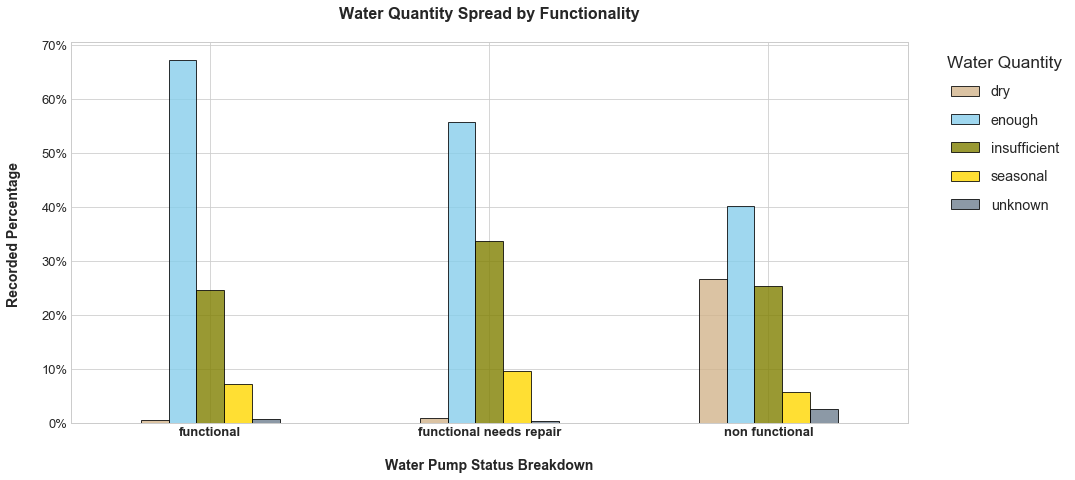

In [53]:
#Create a workable dataframe for quantity
quant = create_sg_subdf("quantity_group")

#Plot the quantity to status group
ax = quant.plot(kind = 'bar', figsize = (15, 7), alpha = .8, edgecolor = 'black', 
                color = ['tan', 'skyblue', 'olive', 'gold', 'slategray'])

#Format axis
plt.xticks(fontsize = 13, fontweight = 'bold', rotation = 0)
plt.xlabel('\nWater Pump Status Breakdown', fontsize = 14, fontweight = 'bold')
plt.yticks(fontsize = 13)
ax.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))
plt.ylabel("Recorded Percentage \n", fontweight = 'bold', fontsize = 14)

#Format plot
ax.legend(loc = 'upper right', bbox_to_anchor = (1.2, 1), title = 'Water Quantity',
          title_fontsize = 'xx-large', fontsize = 'x-large', labelspacing = 1)
plt.title("Water Quantity Spread by Functionality\n", fontsize = 16, fontweight = 'bold');

### Water Source

In [54]:
#Create a workable dataframe fror visualization
source1 = create_sg_subdf("source_class")
source2 = create_sg_subdf("source")

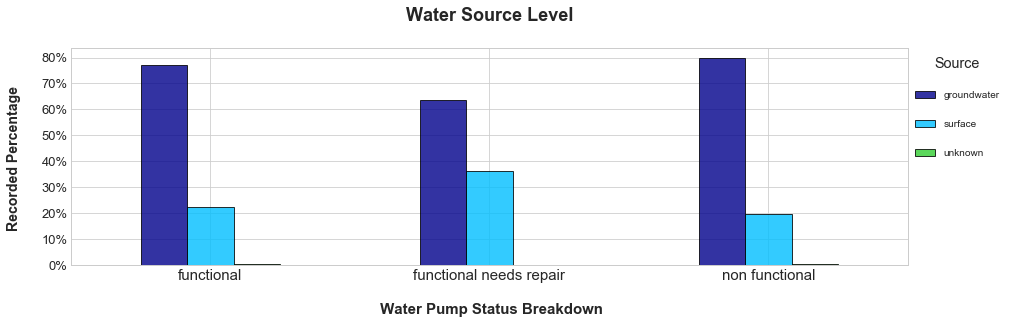

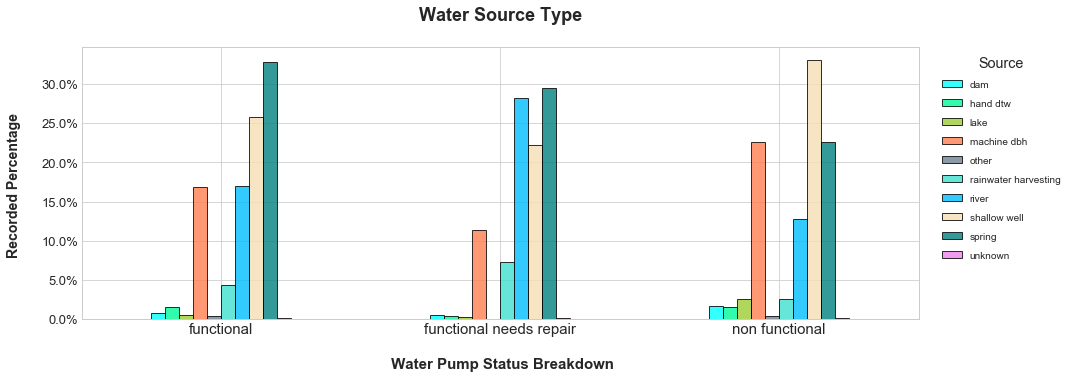

In [59]:
#Plot and Format source1
ax1 = source1.plot(kind = 'bar', figsize = (15, 4), edgecolor = 'black', color = ['darkblue', 'deepskyblue', 
                                                                                  'limegreen'], alpha = .8)

plt.xticks(fontsize = 15, rotation = 0)
plt.xlabel('\n Water Pump Status Breakdown', fontsize = 15, fontweight = 'bold')
plt.yticks(fontsize = 13)
ax1.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))
plt.ylabel("Recorded Percentage \n", fontweight = 'bold', fontsize = 14)

ax1.legend(loc = 'upper right', bbox_to_anchor = (1.12, 1), title = 'Source',
          title_fontsize = 'x-large', fontsize = 'medium', labelspacing = 2)
plt.title("Water Source Level\n", fontsize = 18, fontweight = 'bold');

#Plot and Format source2
ax2 = source2.plot(kind = 'bar', figsize = (15, 5), edgecolor = 'black', alpha = .8,
                  color = ['cyan', 'mediumspringgreen', 'yellowgreen', 'coral', 'slategray', 
                          'turquoise', 'deepskyblue', 'wheat', 'teal', 'violet'])

plt.xticks(fontsize = 15, rotation = 0)
plt.xlabel('\n Water Pump Status Breakdown', fontsize = 15, fontweight = 'bold')
plt.yticks(fontsize = 13)
ax2.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))
plt.ylabel("Recorded Percentage \n", fontweight = 'bold', fontsize = 14)

ax2.legend(loc = 'upper right', bbox_to_anchor = (1.18, 1), title = 'Source',
          title_fontsize = 'x-large', fontsize = 'medium', labelspacing = 1)
plt.title("Water Source Type\n", fontsize = 18, fontweight = 'bold');

### Pumps Characterstics

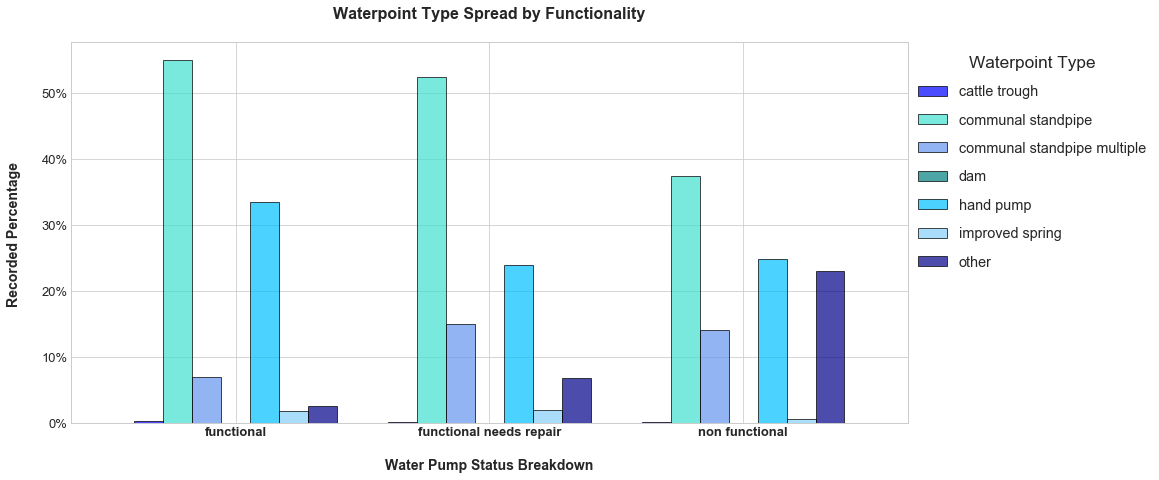

In [56]:
#Create workable datafame for visualization
wtp = create_sg_subdf('waterpoint_type')

#Plot the waterpoint type to status group
ax = wtp.plot(kind = 'bar', figsize = (15, 7), color = ['blue', 'turquoise', 'cornflowerblue', 'teal', 
                                                       'deepskyblue', 'lightskyblue', 'darkblue'], alpha = .7,
             width = .8, edgecolor = 'black')

#Format axis
plt.xticks(fontsize = 13, fontweight = 'bold', rotation = 0)
plt.xlabel('\nWater Pump Status Breakdown', fontsize = 14, fontweight = 'bold')
plt.yticks(fontsize = 13)
ax.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))
plt.ylabel("Recorded Percentage \n", fontweight = 'bold', fontsize = 14)

#Format plot
ax.legend(loc = 'upper right', bbox_to_anchor = (1.3, 1), title = 'Waterpoint Type',
          title_fontsize = 'xx-large', fontsize = 'x-large', labelspacing = 1)
plt.title("Waterpoint Type Spread by Functionality\n", fontsize = 16, fontweight = 'bold');

### Water Quality

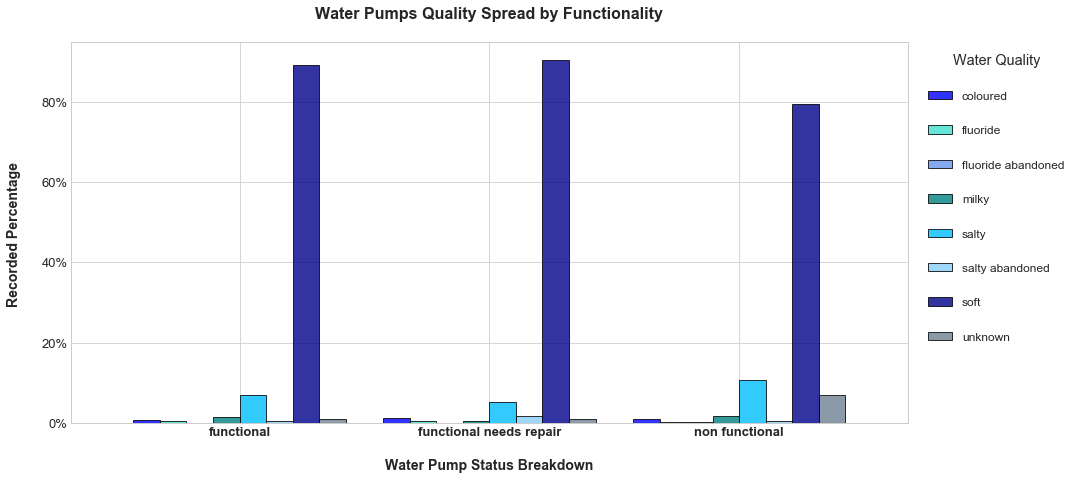

In [60]:
#Create workable dataframe
qual = create_sg_subdf('water_quality')

#Plot the waterpoint type to status group
ax = qual.plot(kind = 'bar', figsize = (15, 7), width = .85, alpha = .8, edgecolor = 'black', 
               color = ['blue', 'turquoise', 'cornflowerblue', 'teal', 
                        'deepskyblue', 'lightskyblue', 'darkblue', 'slategray'])

#Format axis
plt.xticks(fontsize = 13, fontweight = 'bold', rotation = 0)
plt.xlabel('\nWater Pump Status Breakdown', fontsize = 14, fontweight = 'bold')
plt.yticks(fontsize = 13)
ax.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))
plt.ylabel("Recorded Percentage \n", fontweight = 'bold', fontsize = 14)

#Format plot
ax.legend(loc = 'upper right', bbox_to_anchor = (1.2, 1), title = 'Water Quality',
          title_fontsize = 'x-large', fontsize = 'large', labelspacing = 2)
plt.title("Water Pumps Quality Spread by Functionality\n", fontsize = 16, fontweight = 'bold');

## Management and Operation

### Extraction Type

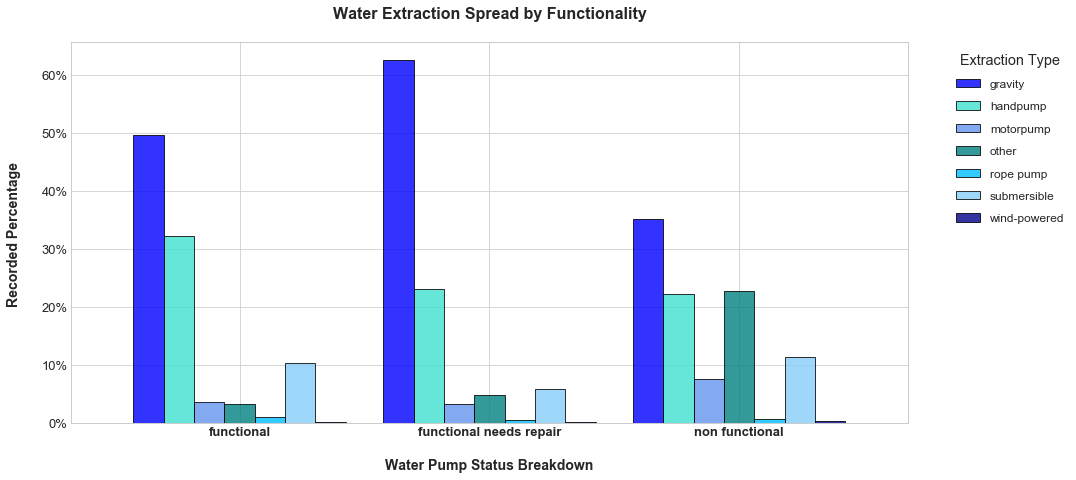

In [62]:
#Create workable dataframe
extrac = create_sg_subdf('extraction_type_class')

#Plot the waterpoint type to status group
ax = extrac.plot(kind = 'bar', figsize = (15, 7), width = .85, alpha = .8, edgecolor = 'black',
                color = ['blue', 'turquoise', 'cornflowerblue', 'teal', 
                                 'deepskyblue', 'lightskyblue', 'darkblue'])

#Format axis
plt.xticks(fontsize = 13, fontweight = 'bold', rotation = 0)
plt.xlabel('\nWater Pump Status Breakdown', fontsize = 14, fontweight = 'bold')
plt.yticks(fontsize = 13)
ax.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))
plt.ylabel("Recorded Percentage \n", fontweight = 'bold', fontsize = 14)

#Format plot
ax.legend(loc = 'upper right', bbox_to_anchor = (1.2, 1), title = 'Extraction Type',
          title_fontsize = 'x-large', fontsize = 'large', labelspacing = 1)
plt.title("Water Extraction Spread by Functionality\n", fontsize = 16, fontweight = 'bold');

### Type of Management

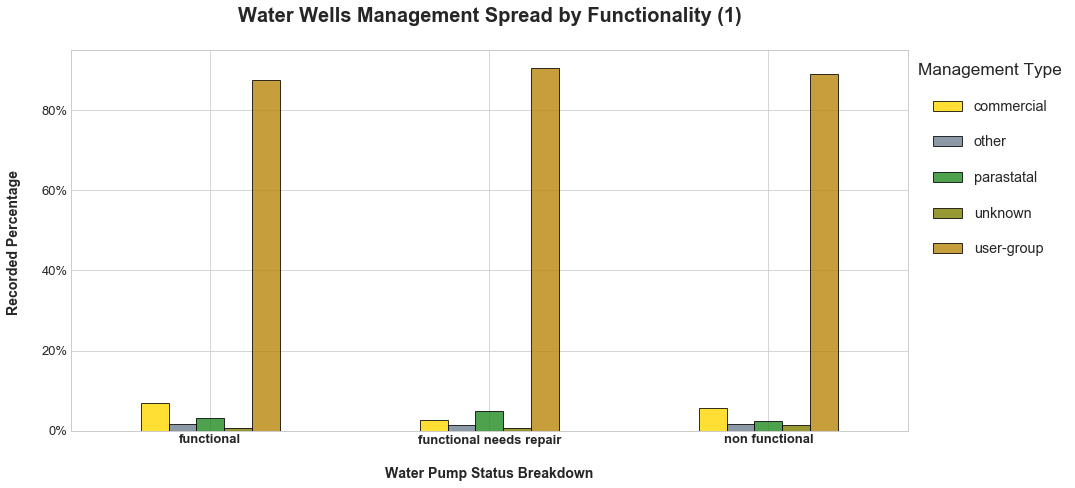

In [65]:
#Create workable dataframe
mgmt = create_sg_subdf('management_group')

#Plot the waterpoint type to status group
ax = mgmt.plot(kind = 'bar', figsize = (15, 7), width = .5, alpha = .8, edgecolor = 'black',
              color = ['gold', 'slategray', 'forestgreen', 'olive', 'darkgoldenrod'])

#Format axis
plt.xticks(fontsize = 13, fontweight = 'bold', rotation = 0)
plt.xlabel('\nWater Pump Status Breakdown', fontsize = 14, fontweight = 'bold')
plt.yticks(fontsize = 13)
ax.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))
plt.ylabel("Recorded Percentage \n", fontweight = 'bold', fontsize = 14)

#Format plot
ax.legend(loc = 'upper right', bbox_to_anchor = (1.2, 1), title = 'Management Type',
          title_fontsize = 'xx-large', fontsize = 'x-large', labelspacing = 1.5)
plt.title("Water Wells Management Spread by Functionality (1)\n", fontsize = 20, fontweight = 'bold');

In [66]:
mgmt.head()

management_group,commercial,other,parastatal,unknown,user-group
status_group,,,,,
functional,0.069283,0.016368,0.031619,0.006944,0.875787
functional needs repair,0.027102,0.012972,0.048877,0.006254,0.904795
non functional,0.056344,0.015729,0.023528,0.013582,0.890817


In [67]:
#Created zoomed in df
mgmtzoom = mgmt.drop('user-group', axis = 1)

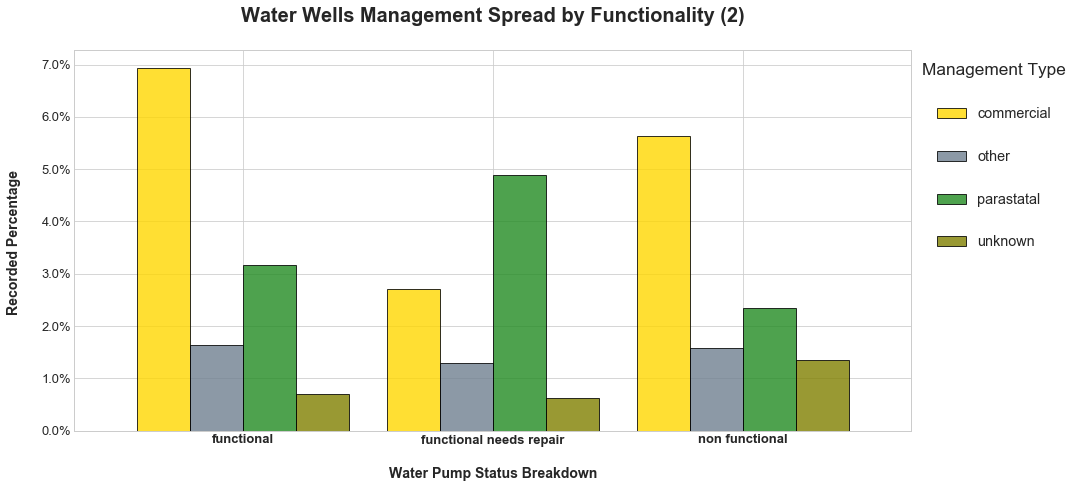

In [68]:
#Plot the waterpoint type to status group
ax = mgmtzoom.plot(kind = 'bar', figsize = (15, 7), width = .85, alpha = .8, edgecolor = 'black',
                  color = ['gold', 'slategray', 'forestgreen', 'olive'])

#Format axis
plt.xticks(fontsize = 13, fontweight = 'bold', rotation = 0)
plt.xlabel('\nWater Pump Status Breakdown', fontsize = 14, fontweight = 'bold')
plt.yticks(fontsize = 13)
ax.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))
plt.ylabel("Recorded Percentage \n", fontweight = 'bold', fontsize = 14)

#Format plot
ax.legend(loc = 'upper right', bbox_to_anchor = (1.2, 1), title = 'Management Type',
          title_fontsize = 'xx-large', fontsize = 'x-large', labelspacing = 2)
plt.title("Water Wells Management Spread by Functionality (2)\n", fontsize = 20, fontweight = 'bold');

### Payment Type

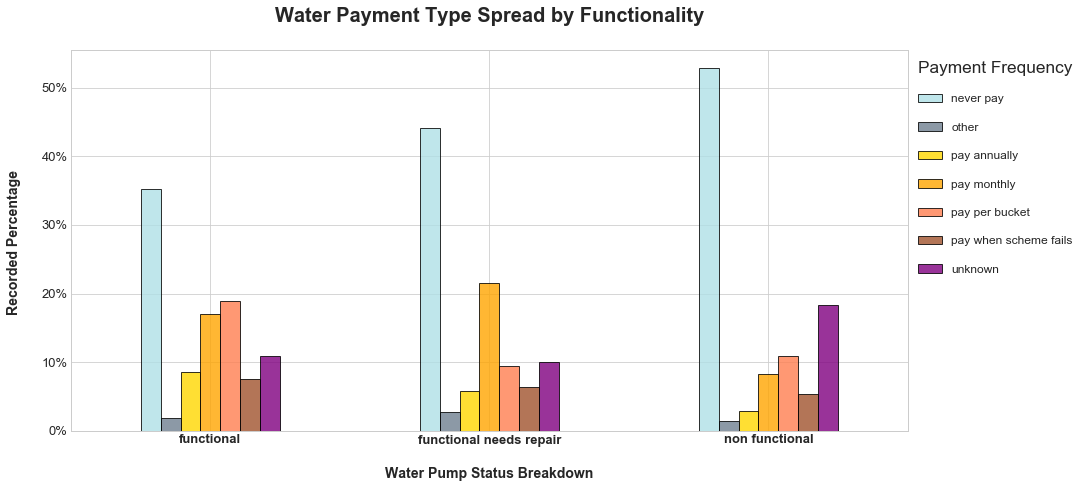

In [80]:
#Create workable dataframe
cost = create_sg_subdf('payment')

#Plot the waterpoint type to status group
ax = cost.plot(kind = 'bar', figsize = (15, 7), width = .5, alpha = .8, edgecolor = 'black',
              color = ['powderblue', 'slategray', 'gold', 'orange', 'coral', 'sienna', 'purple'])

#Format axis
plt.xticks(fontsize = 13, fontweight = 'bold', rotation = 0)
plt.xlabel('\nWater Pump Status Breakdown', fontsize = 14, fontweight = 'bold')
plt.yticks(fontsize = 13)
ax.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))
plt.ylabel("Recorded Percentage \n", fontweight = 'bold', fontsize = 14)

#Format plot
ax.legend(loc = 'upper right', bbox_to_anchor = (1.21, 1), title = 'Payment Frequency',
          title_fontsize = 'xx-large', fontsize = 'large', labelspacing = 1.5)
plt.title("Water Payment Type Spread by Functionality\n", fontsize = 20, fontweight = 'bold');

## Export DataFrame

In [102]:
df.to_csv('data_for_modeling.csv', index = False)